In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [52]:
path = "/Users/mervecolak/.cache/kagglehub/datasets/arsalanjamal002/student-sleep-patterns/versions/1/student_sleep_patterns.csv"
df = pd.read_csv(path, encoding="utf-8")
df


,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


In [53]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB
None
       Student_ID        Ag

In [54]:
df.dropna(inplace=True)

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Gender_Male,Gender_Other,University_Year_2nd Year,University_Year_3rd Year,University_Year_4th Year
0,1,24,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06,False,True,True,False,False
1,2,21,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21,True,False,False,False,False
2,3,22,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92,True,False,False,False,True
3,4,24,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42,False,True,False,False,True
4,5,20,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78,True,False,True,False,False
496,497,20,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23,True,False,True,False,False
497,498,21,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72,True,False,False,True,False
498,499,18,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20,False,False,True,False,False


In [56]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_encoded)
print(df_scaled[0])

[-1.72859016  1.05714043  0.82706934  0.55249521  1.01915544 -0.27489503
 -0.7208347   1.56462951  0.50166796 -1.43950926  0.40617926 -1.73680644
 -0.76964712  1.5421992   1.67833069 -0.59891206 -0.53727069]


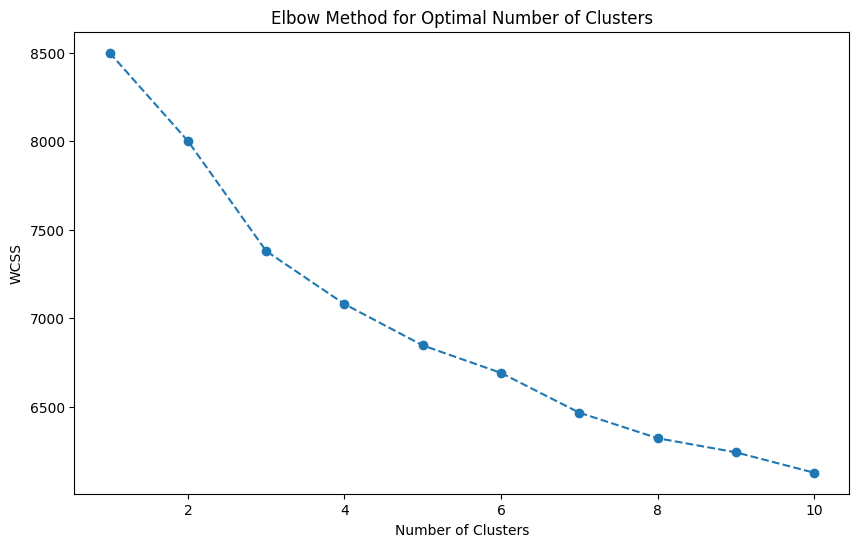

In [57]:
# Calculate the Within-Cluster Sum of Squares (WCSS) for different cluster counts
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=6, random_state=42)

In [59]:
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.predict(df_scaled)
df_encoded['Cluster'] = kmeans.predict(df_scaled)
df_encoded

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Gender_Male,Gender_Other,University_Year_2nd Year,University_Year_3rd Year,University_Year_4th Year,Cluster
0,1,24,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06,False,True,True,False,False,0
1,2,21,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21,True,False,False,False,False,4
2,3,22,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92,True,False,False,False,True,2
3,4,24,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42,False,True,False,False,True,1
4,5,20,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01,True,False,False,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78,True,False,True,False,False,4
496,497,20,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23,True,False,True,False,False,4
497,498,21,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72,True,False,False,True,False,5
498,499,18,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20,False,False,True,False,False,4


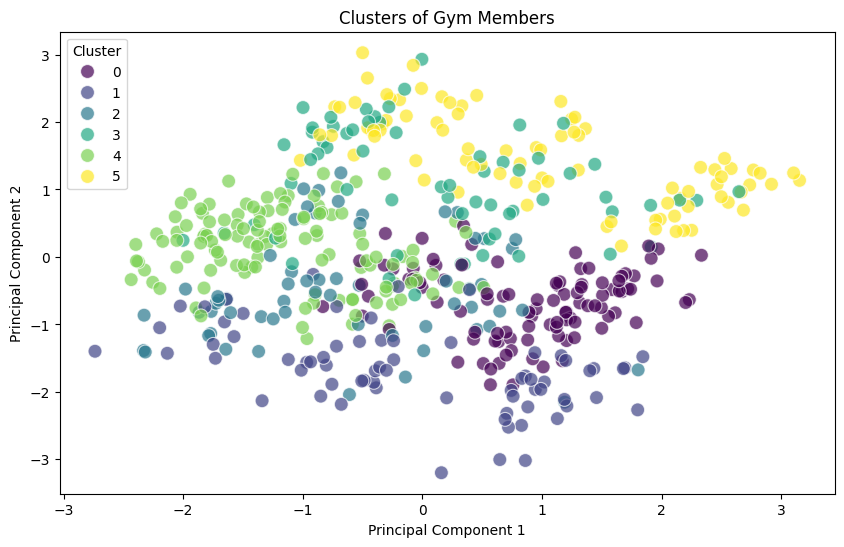

In [60]:
# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the scaled data
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Gym Members')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [61]:
# Group the original DataFrame by cluster and calculate mean values
cluster_analysis = df_encoded.groupby('Cluster').mean()

# Display the cluster analysis
print(cluster_analysis)

         Student_ID        Age  Sleep_Duration  Study_Hours  Screen_Time  \
Cluster                                                                    
0        234.650000  22.040000        6.991000     6.407000     2.587000   
1        271.449275  20.318841        6.637681     4.930435     2.768116   
2        215.881356  22.881356        5.630508     6.679661     2.233898   
3        235.969231  21.769231        7.346154     6.327692     2.501538   
4        268.565574  20.713115        6.163115     5.249180     2.590984   
5        261.352941  22.000000        6.088235     6.636471     2.380000   

         Caffeine_Intake  Physical_Activity  Sleep_Quality  \
Cluster                                                      
0               2.290000          65.750000       5.300000   
1               2.826087          63.695652       6.115942   
2               1.745763          64.254237       4.186441   
3               2.492308          47.461538       3.046154   
4               2.6

In [71]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(df_scaled, method='ward')

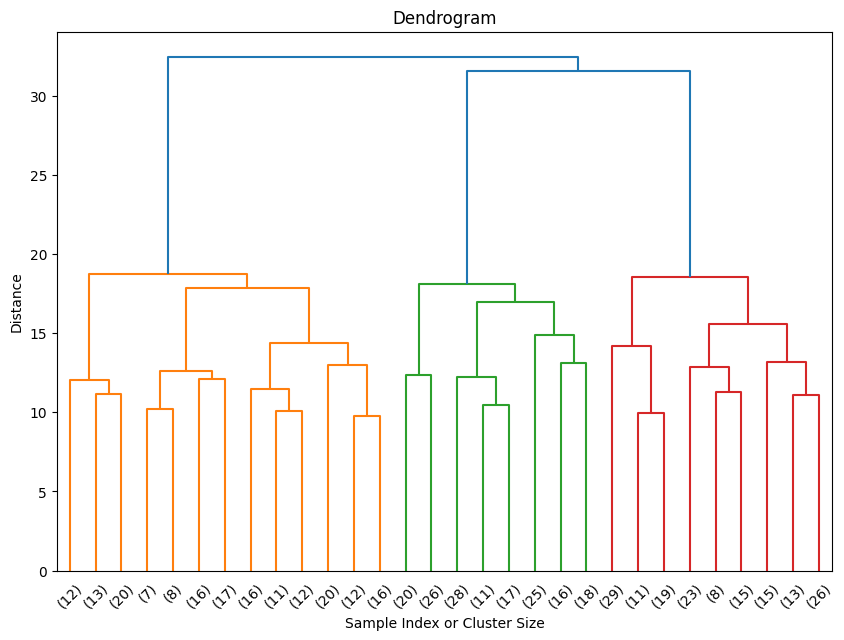

In [72]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=30)
plt.title("Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()

In [73]:
from scipy.cluster.hierarchy import fcluster

# Extract cluster labels
num_clusters = 3  # Replace with your chosen number of clusters
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [74]:
df_encoded['Cluster'] = clusters

In [75]:
# Analyze cluster characteristics
cluster_analysis = df_encoded.groupby('Cluster').mean()
print(cluster_analysis)

         Student_ID        Age  Sleep_Duration  Study_Hours  Screen_Time  \
Cluster                                                                    
1        238.416667  21.944444        6.210000     6.521667     2.425000   
2        246.211180  21.124224        6.672671     5.833540     2.591925   
3        268.522013  21.490566        6.566667     5.520126     2.570440   

         Caffeine_Intake  Physical_Activity  Sleep_Quality  \
Cluster                                                      
1               2.427778          65.105556       5.372222   
2               2.590062          58.813665       5.186335   
3               2.371069          62.786164       5.528302   

         Weekday_Sleep_Start  Weekend_Sleep_Start  Weekday_Sleep_End  \
Cluster                                                                
1                  10.946500            11.540667           7.014167   
2                  10.709130            13.655528           6.807329   
3                  1

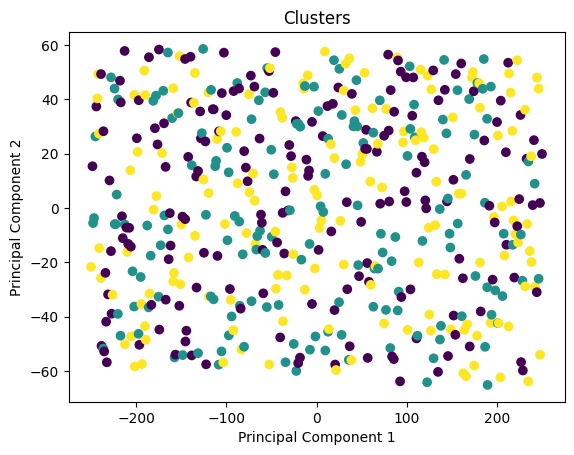

In [78]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_encoded)

# Plot the clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
